<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/R%20for%20Beginners/anova_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)



# **Analysis of Variance (ANOVA) in R**


## Introduction

Analysis of Variance (ANOVA) is a statistical technique used to compare the means of three or more groups, enabling us to determine whether there are significant differences between them. This method is widely used in research to help us understand whether the differences we observe among group means are due to genuine differences in the populations or simply random sampling variation.

ANOVA works by breaking down the total variance observed in the data into different components: the variance between group means and the variance within each group. It then examines whether the between-group variance is significantly larger than the within-group variance. If it is, this indicates that there are real differences among the groups.

There are various types of ANOVA, including one-way ANOVA, which compares the means of three or more groups on a single independent variable, and two-way ANOVA, which examines the influence of two independent variables. More complex designs, such as factorial ANOVA, can be used for multiple factors.

During ANOVA, an F-statistic is generated, which compares the ratio of the between-group variance to the within-group variance. If the calculated F-value exceeds a critical value based on the chosen significance level, usually 0.05, it suggests that there is a statistically significant difference between at least two group means.

Post-hoc tests, such as Tukey's HSD or Bonferroni correction, are often used after ANOVA to pinpoint which specific groups differ from each other if the overall ANOVA result is significant. It's important to note that ANOVA makes certain assumptions, such as the data following a normal distribution and the groups having equal variances. Violations of these assumptions may affect the reliability of the ANOVA results.

Overall, ANOVA is a powerful tool for comparing means across multiple groups simultaneously. It's commonly used in various fields, such as psychology, biology, economics, and more to analyze experimental or observational data. By comparing group means, ANOVA helps us to understand the differences between groups and identify significant patterns in the data.

## Assumptions

When conducting a research study with multiple groups, it is important to consider several factors to ensure accurate and reliable results. The first consideration is the **independence of the observations**. Each subject should belong to only one group, and there should be no relationship between the observations in each group. This means that having repeated measures for the same participants is not allowed, as this could introduce bias into the results.

The second consideration is the **presence of any significant outliers** in any design cell. Outliers are observations that fall far outside the expected range of values and can significantly impact the results of the study. Identifying and removing any outliers before analyzing the data is important to ensure accurate results.

The third consideration is **normality**. The data for each design cell should be approximately normally distributed, meaning that the data should follow a bell-shaped curve when plotted on a graph. Non-normal data can be transformed to meet this assumption, but this should be done carefully and with consideration of the impact on the results.

Finally, it is important to ensure **homogeneity of variances**. This means that the variance of the outcome variable should be equal in every design cell. If the variances are not equal, the study results could be affected, and it may be necessary to use alternative statistical methods to analyze the data.


## Install rpy2

Easy way to run R in Colab with Python runtime using **rpy2** python package. We have to install this package using the `pip` command:

In [ ]:
!pip uninstall rpy2 -y
! pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314929 sha256=fd8b46a5451a4a4168cfd0eb84f25e1be0412265916ac4794b4b0cd8920a6dbb
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install Required R Packages

In these exercise we will use following R-Packages:

[tydyverse](https://www.tidyverse.org/): The tidyverse is a collection of R packages designed for data science.

[ggstatsplot](https://indrajeetpatil.github.io/ggstatsplot/): ggplot2 based lots with statistical details

[GGally](https://ggobi.github.io/ggally/): GGally extends ggplot2 by adding several functions to reduce the complexity of combining geoms with transformed data.

[ggExtra](https://cran.r-project.org/web/packages/ggExtra/vignettes/ggExtra.html):Add marginal histograms to ggplot2

[ggside](https://cran.r-project.org/web/packages/ggside/vignettes/ggside_basic_usage.html): The package ggside was designed to enable users to add metadata to their ggplots with ease.

[patchwork](https://patchwork.data-imaginist.com/):The goal of patchwork is to make it ridiculously simple to combine separate ggplots into the same graphic.

[gridExtra](https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html):The grid package provides low-level functions to create graphical objects (grobs), and position them on a page in specific viewports.

[rstatix](https://rpkgs.datanovia.com/rstatix/): Provides a simple and intuitive pipe-friendly framework, coherent with the 'tidyverse' design philosophy, for performing basic statistical tests, including t-test, Wilcoxon test, ANOVA, Kruskal-Wallis and correlation analyses.



In [ ]:
%%R
pkg <- c('tidyverse',
         'rstatix',
         'ggstatsplot',
         'GGally',
         'ggExtra',
         'ggside',
         'patchwork',
         'gridExtra',
         'report,
         'patchwork'
         ))
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

## Load Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(report)
library(ggstatsplot)
library(ggExtra)
library(gridExtra)
library(xtable)
library(GGally)
library(rstatix)
library(patchwork)


## Data

In this exercise, we will create a data frame randomly with four treatments, six varieties, and four replications (Total 96 observation).


In [ ]:
%%R
#| warning: false
#| error: false

# Set the number of observations, treatments, replications, and varieties
n <- 1
treatments <- 4
replications <- 4
varieties <- 6
# Create an empty data frame with columns for treatment, replication, variety, and observation
exp.df <- data.frame(
  Treatment = character(),
  Replication = integer(),
  Variety = character(),
  Yield = numeric(),
  stringsAsFactors = FALSE
)
# Generate random data for each treatment, replication, and variety combination
for (t in 1:treatments) {
  for (r in 1:replications) {
    for (v in 1:varieties) {
      # Generate n random observations for the current combination of treatment, replication, and variety
      obs <- rnorm(n, mean = 3*t + 0.95*r + 0.90*v, sd = 0.25)

      # Add the observations to the data frame
      set.seeds= 1256
      exp.df <- rbind(exp.df, data.frame(
        Treatment = paste0("T", t),
        Replication = r,
        Variety = paste0("V", v),
        Yield = obs
      ))
    }
  }
}

# Print the first 10 rows of the data frame
glimpse(exp.df)

Rows: 96
Columns: 4
$ Treatment   <chr> "T1", "T1", "T1", "T1", "T1", "T1", "T1", "T1", "T1", "T1"…
$ Replication <int> 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4…
$ Variety     <chr> "V1", "V2", "V3", "V4", "V5", "V6", "V1", "V2", "V3", "V4"…
$ Yield       <dbl> 4.925422, 5.834368, 6.349863, 7.955016, 8.624773, 9.455805…


## One-way analysis of variance (ANOVA)

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more independent (unrelated) groups. The one-way analysis of variance (ANOVA) is a statistical test used to determine whether there are any statistically significant differences between the means of three or more independent groups.

The formula for the one-way ANOVA F-statistic is as follows:

$$ F = \frac{MSB}{MSW} $$

-   Where:
    -   $F$ is the F-statistic.
    -   $MSB$ is the Mean Square Between (variability between group means).
    -   $MSW$ is the Mean Square Within (variability within each group).

**Mean Square Between (MSB):**

$$ MSB = \frac{\sum_{i=1}^{k} n_i(\bar{X}_i - \bar{X})^2}{k-1} $$

-   Where:
    -   $k$ is the number of groups.
    -   $n_i$ is the number of observations in group $i$.
    -   $\bar{X}_i$ is the mean of group $i$.
    -   $\bar{X}$ is the overall mean.

**Mean Square Within (MSW):**

$$ MSW = \frac{\sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2}{N-k} $$

-   Where:
    -   $N$ is the total number of observations across all groups.
    -   $X_{ij}$ is the $j^{th}$ observation in group $i$.
    -   $\bar{X}_i$ is the mean of group $i$.

In these formulas, $\bar{X}_i$ represents the mean of each group, $n_i$ is the number of observations in each group, and $k$ is the number of groups. The F-statistic is used to assess whether the variability between group means $MSB$ is significantly larger than the variability within each group $MSW$, indicating whether there are significant differences between at least two group means.

The output of an ANOVA test includes an `F-statistic`, which is a measure of the difference between the groups, and a `p-value`, which indicates the probability of obtaining the observed difference by chance. If the `p-value` is less than a chosen significance level (typically 0.05), then the null hypothesis, which states that there is no significant difference between the means of the groups, can be rejected.


ANOVA in R can be performed using the built-in `aov()` function. This function takes a formula as an argument, where the dependent variable is on the left side of the tilde (\~), and the independent variables are on the right side, separated by +. We will use dataset we have created before to see the main effect of treatment on yield.

In [ ]:
%%R
anova.one=aov (Yield ~Treatment, data = exp.df) # analysis variance
anova (anova.one)

Analysis of Variance Table

Response: Yield
          Df  Sum Sq Mean Sq F value    Pr(>F)    
Treatment  3 1073.68  357.89  98.446 < 2.2e-16 ***
Residuals 92  334.46    3.64                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


A nice and easy way to report results of an ANOVA in R is with the `report()` function from the **report** package

In [ ]:
%%R
report(anova.one)

The ANOVA (formula: Yield ~ Treatment) suggests that:

  - The main effect of Treatment is statistically significant and large (F(3, 92)
= 98.45, p < .001; Eta2 = 0.76, 95% CI [0.69, 1.00])

Effect sizes were labelled following Field's (2013) recommendations.


### Two-way ANOVA

Two-way ANOVA (analysis of variance) or factorial ANOVA is a statistical method used to analyze the effects of two categorical independent variables, or factors, or continuous dependent variables. It tests for the main effects of each factor and their interaction effect.

In a two-way ANOVA, we consider the effects of two categorical independent variables on a continuous dependent variable. The general formula for the observed value $Y_{ijk}$ in a two-way ANOVA is as follows:

$$ Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha \beta)_{ij} + \epsilon_{ijk} $$

Where: - $Y_{ijk}$ is the observed value for the $i^{th}$ level of the first independent variable, the $j^{th}$ level of the second independent variable, and the $k^{th}$ observation. - $\mu$ is the overall mean. - $\alpha_i$ represents the effect of the $i^{th}$ level of the first independent variable. - $\beta_j$ represents the effect of the $j^{th}$ level of the second independent variable. - $(\alpha \beta)_{ij}$ is the interaction effect between the $i^{th}$ level of the first independent variable and the $j^{th}$ level of the second independent variable. - $\epsilon_{ijk}$ is the random error term.

Now, let's expand the terms for each effect:

1.  **Overall Mean (**$\mu$):

$$ \mu = \frac{\sum_{i=1}^{a} \sum_{j=1}^{b} \sum_{k=1}^{n} Y_{ijk}}{a \cdot b \cdot n} $$ Where: - $a$ is the number of levels in the first independent variable. - $b$ is the number of levels in the second independent variable. - $n$ is the number of observations in each cell.

2.  **Main Effects:**
    -   **Main Effect of the First Independent Variable (**$\alpha_i$): $$ \alpha_i = \frac{\sum_{j=1}^{b} \sum_{k=1}^{n} Y_{ijk}}{b \cdot n} - \mu $$

    -   **Main Effect of the Second Independent Variable (**$\beta_j$): $$ \beta_j = \frac{\sum_{i=1}^{a} \sum_{k=1}^{n} Y_{ijk}}{a \cdot n} - \mu $$
3.  **Interaction Effect (**$\alpha \beta)_{ij}$):

$$ (\alpha \beta)_{ij} = \frac{\sum_{k=1}^{n} Y_{ijk}}{n} - \left(\mu + \alpha_i + \beta_j\right) $$


4.  **Error Term (**$\epsilon_{ijk}$): $$ \epsilon_{ijk} = Y_{ijk} - \left(\mu + \alpha_i + \beta_j + (\alpha \beta)_{ij}\right) $$

In these formulas, $Y_{ijk}$ represents the observed values, $\mu$ is the overall mean, $\alpha_i$ and $\beta_j$ are the main effects, $(\alpha \beta)_{ij}$) is the interaction effect, and $\epsilon_{ijk}$ is the random error term. These effects help explain the variability in the observed values due to the independent variables and their interaction. The goal of two-way ANOVA is to test the significance of these effects.

Here is an example code for a two-way ANOVA with one dependent variable (Yield), and two independent variables (Treatment and Variety) with interaction effect:

In [ ]:
%%R
anova.two =aov (Yield ~Treatment + Variety+ Treatment:Variety, data = exp.df)
anova (anova.two)

Analysis of Variance Table

Response: Yield
                  Df  Sum Sq Mean Sq  F value Pr(>F)    
Treatment          3 1073.68  357.89 239.1254 <2e-16 ***
Variety            5  226.19   45.24  30.2254 <2e-16 ***
Treatment:Variety 15    0.51    0.03   0.0227      1    
Residuals         72  107.76    1.50                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


From the ANOVA table we can conclude that both Treatment and Variety statistically significant.

In [ ]:
%%R
report(anova.two)

The ANOVA (formula: Yield ~ Treatment + Variety + Treatment:Variety) suggests
that:

  - The main effect of Treatment is statistically significant and large (F(3, 72)
= 239.13, p < .001; Eta2 (partial) = 0.91, 95% CI [0.88, 1.00])
  - The main effect of Variety is statistically significant and large (F(5, 72) =
30.23, p < .001; Eta2 (partial) = 0.68, 95% CI [0.57, 1.00])
  - The interaction between Treatment and Variety is statistically not
significant and very small (F(15, 72) = 0.02, p > .999; Eta2 (partial) =
4.72e-03, 95% CI [0.00, 1.00])

Effect sizes were labelled following Field's (2013) recommendations.



## Multiple Comparisons

After performing an ANOVA, if the overall F-test is significant, we may want to determine which groups differ significantly from each other in terms of the dependent variable. This can be done using post-hoc tests or multiple comparison tests.

When conducting a study with three or more groups and analyzing the data using ANOVA or a similar statistical test, you may encounter a significant difference among the group means. However, this result does not provide information about which specific pairs of group means differ significantly from each other. To identify these differences, you can use multiple comparison procedures.

Multiple comparisons refer to a set of statistical techniques that allow you to conduct pairwise comparisons between the means of different groups in a study. These comparisons are performed after a significant result in ANOVA or a similar test and help you identify which specific groups have significantly different means.

There are several ways to perform multiple comparisons, including **pairwise t-tests**, **Tukey's HSD test**, **Scheffe's test** and **Bonferroni correction**. Each procedure has its strengths and weaknesses, and the choice of which one to use depends on various factors, such as the number of groups being compared and the desired level of statistical significance.

Using multiple comparison procedures is crucial in statistical analysis as it helps you avoid making false conclusions by controlling the overall risk of making a **Type I error**. By identifying which specific pairs of group means are significantly different from each other, you can gain a more comprehensive understanding of your data, which can inform future research and decision-making.


### Tukey's Honestly Significant Difference (HSD) test

Tukey's Honestly Significant Difference (HSD) test is a powerful statistical method that is commonly used in experimental research to compare multiple groups and determine if their means significantly differ from each other. One of the major advantages of the HSD test is that it controls the familywise error rate, which means it helps to reduce the likelihood of making a type I error (false positive) when comparing groups. This is achieved by providing a confidence interval that helps to identify which pairs of group means differ significantly from each other, while maintaining an appropriate level of statistical significance. Overall, Tukey's HSD test is a reliable tool that can help researchers make accurate and informed decisions when analyzing experimental data.

In R, the `TukeyHSD()` function can be used to perform **Tukey's HSD test**, which returns a table of pairwise comparisons between the groups, along with the adjusted p-values:

In [ ]:
%%R
# one-way anova
tukey.one <- TukeyHSD(anova.one)
tukey.one

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Yield ~ Treatment, data = exp.df)

$Treatment
          diff      lwr       upr   p adj
T2-T1 3.063630 1.623413  4.503846 1.5e-06
T3-T1 6.006345 4.566128  7.446561 0.0e+00
T4-T1 8.989481 7.549265 10.429697 0.0e+00
T3-T2 2.942715 1.502499  4.382932 3.8e-06
T4-T2 5.925851 4.485635  7.366068 0.0e+00
T4-T3 2.983136 1.542920  4.423353 2.8e-06



The table shows the differences between the groups and the 95% confidence intervals for each difference. If the confidence interval does not include zero, the difference between the groups is significant at the specified level.


In [ ]:
%%R
# two-way ANOVA
tukey.two <- TukeyHSD(anova.two)
head(tukey.two$`Treatment:Variety`, 20)


                 diff        lwr       upr        p adj
T2:V1-T1:V1  3.013852 -0.2575293  6.285234 1.109686e-01
T3:V1-T1:V1  5.986678  2.7152963  9.258060 4.104345e-07
T4:V1-T1:V1  8.975455  5.7040737 12.246837 0.000000e+00
T1:V2-T1:V1  0.991701 -2.2796807  4.263083 9.999629e-01
T2:V2-T1:V1  4.108640  0.8372584  7.380022 2.200279e-03
T3:V2-T1:V1  6.870753  3.5993711 10.142134 5.228930e-09
T4:V2-T1:V1  9.950296  6.6789146 13.221678 0.000000e+00
T1:V3-T1:V1  1.945957 -1.3254248  5.217339 8.312449e-01
T2:V3-T1:V1  4.943624  1.6722419  8.215005 5.758941e-05
T3:V3-T1:V1  7.872391  4.6010088 11.143772 0.000000e+00
T4:V3-T1:V1 10.903898  7.6325168 14.175280 0.000000e+00
T1:V4-T1:V1  2.568285 -0.7030968  5.839667 3.415321e-01
T2:V4-T1:V1  5.899541  2.6281592  9.170923 6.266847e-07
T3:V4-T1:V1  8.886162  5.6147806 12.157544 0.000000e+00
T4:V4-T1:V1 11.823740  8.5523586 15.095122 0.000000e+00
T1:V5-T1:V1  3.673013  0.4016314  6.944395 1.218768e-02
T2:V5-T1:V1  6.535766  3.2643846  9.807148 2.774

Instead of printing the TukeyHSD results in a table, we’ll do it in a graph

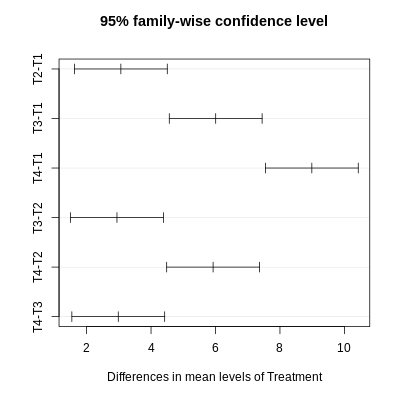

In [ ]:
%%R -w 400 -h 400 -u px
# with plot() function
plot(tukey.one)


### Pairewise t-test

The `pairwise.t.test()` function can be used to perform Bonferroni correction or other multiple comparison tests. For example, to perform pairwise comparisons using Bonferroni correction, we can use:

In [ ]:
%%R -w 500 -h 400 -u px

pairwise.t.test(exp.df$Yield, exp.df$Treatment,
                 p.adjust.method = "bonferroni",
                 paired=FALSE)


	Pairwise comparisons using t tests with pooled SD 

data:  exp.df$Yield and exp.df$Treatment 

   T1      T2      T3     
T2 1.5e-06 -       -      
T3 < 2e-16 3.9e-06 -      
T4 < 2e-16 < 2e-16 2.9e-06

P value adjustment method: bonferroni 


### Box/Violin plots for between-subjects comparisons

We can create a nice looking plots with results of ANOVA and post-hoc tests on the same plot (directly on the boxplots). We will use `gbetweenstats()` function of **ggstatsplot** package:

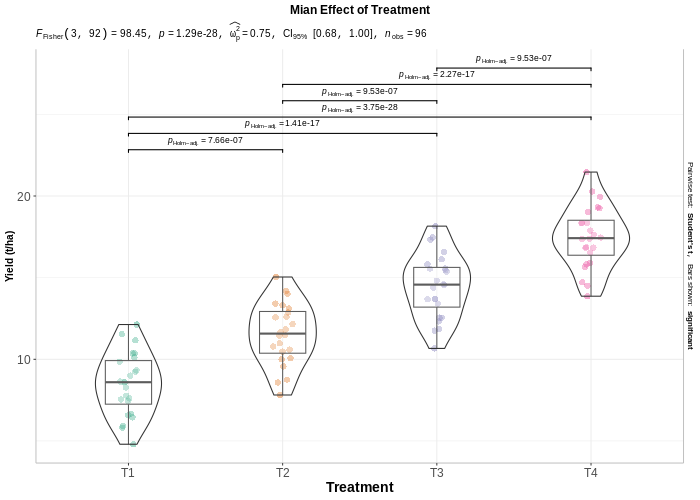

In [ ]:
%%R -w 700 -h 500 -u px

p1<-ggstatsplot::ggbetweenstats(
  data = exp.df,
  x = Treatment,
  y = Yield,
  ylab = "Yield (t/ha)",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Mian Effect of Treatment") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))
print(p1)


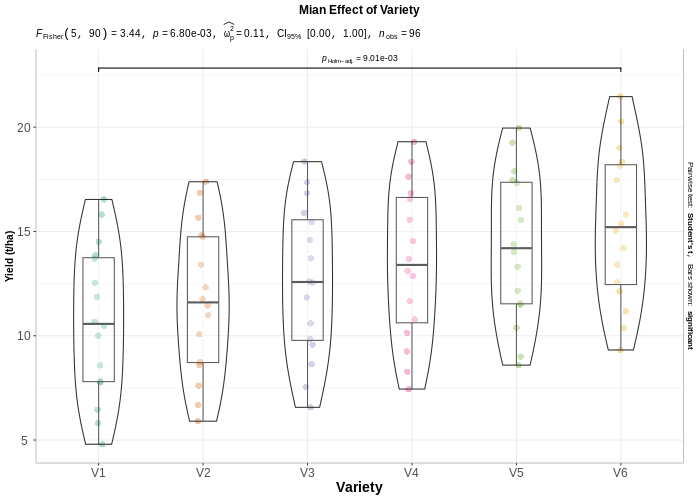

In [ ]:
%%R -w 700 -h 500 -u px

p2<-ggbetweenstats(
  data = exp.df,
  x = Variety,
  y = Yield,
  ylab = "Yield (t/ha)",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Mian Effect of Variety") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))
print(p2)

We plot these plots side by side using **patchwork** package:

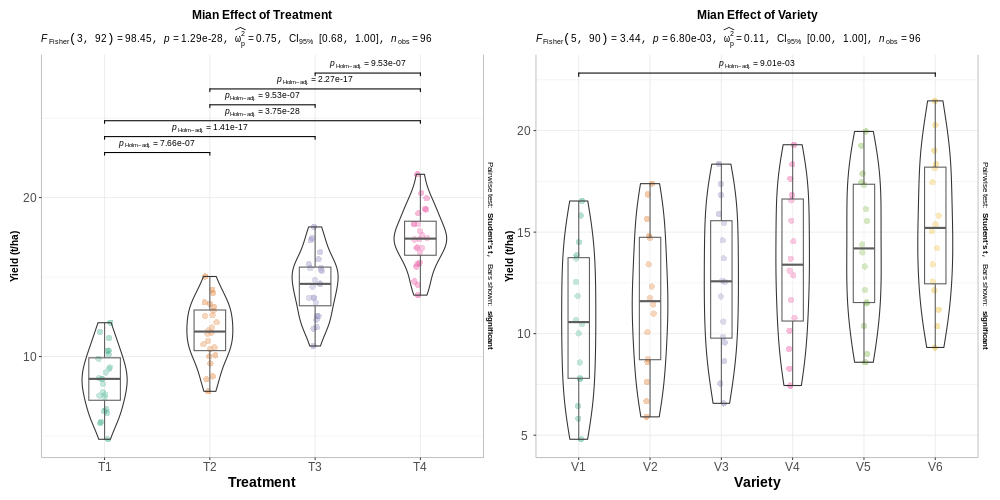

In [ ]:
%%R -w 1000 -h 500 -u px

p1+p2

## **ANOVA with rstatix**

`anova_test()` function in  **rstatix**' package is an easy to use wrapper around `Anova()` and `aov()`. It makes ANOVA computation handy in R and It's highly flexible: can support model and formula as input. Variables can be also specified as character vector using the arguments `dv`, `wid`, `betwee`n, `within`, `covariate`.



### One-way ANOVA test

In [ ]:
%%R
exp.df |> anova_test (Yield ~Treatment)

ANOVA Table (type II tests)

     Effect DFn DFd      F        p p<.05   ges
1 Treatment   3  92 90.821 2.11e-27     * 0.748


### Two-way ANOVA test

In [ ]:
%%R
exp.df |> anova_test (Yield ~Treatment*Variety)

ANOVA Table (type II tests)

             Effect DFn DFd       F        p p<.05   ges
1         Treatment   3  72 211.737 1.24e-35     * 0.898
2           Variety   5  72  28.424 8.62e-16     * 0.664
3 Treatment:Variety  15  72   0.025 1.00e+00       0.005


###  Two-way repeated measures ANOVA

In [ ]:
%%R
exp.df |> anova_test (Yield ~Treatment*Variety + Error(Replication/Treatment*Variety))

ANOVA Table (type III tests)

$ANOVA
             Effect DFn DFd         F        p p<.05   ges
1         Treatment   3   9 20388.294 1.47e-17     * 0.898
2           Variety   5  15   889.890 5.43e-18     * 0.664
3 Treatment:Variety  15  45     0.716 7.55e-01       0.005

$`Mauchly's Test for Sphericity`
     Effect     W     p p<.05
1 Treatment 0.361 0.909      

$`Sphericity Corrections`
     Effect   GGe     DF[GG]    p[GG] p[GG]<.05   HFe      DF[HF]    p[HF]
1 Treatment 0.709 2.13, 6.38 6.65e-13         * 2.486 7.46, 22.37 1.47e-17
  p[HF]<.05
1         *



###  Extract ANOVA table and apply correction

In [ ]:
%%R
res.anova<-exp.df |> anova_test (Yield ~Treatment*Variety + Error(Replication/Treatment*Variety))
get_anova_table(res.anova, correction = "GG")

ANOVA Table (type III tests)

             Effect   DFn   DFd         F        p p<.05   ges
1         Treatment  2.13  6.38 20388.294 6.65e-13     * 0.898
2           Variety  5.00 15.00   889.890 5.43e-18     * 0.664
3 Treatment:Variety 15.00 45.00     0.716 7.55e-01       0.005


## Summary and Conclusion

This tutorial explains how to conduct ANOVA analysis in R. ANOVA is a technique used to compare means across groups, popular in fields like business, psychology, medicine, and engineering. It helps identify differences between groups, which can inform decision-making and further research.

Remember the assumptions underlying ANOVA, including normality, homogeneity of variances, and independence. Conduct appropriate post hoc tests to determine which groups differ significantly. Consider the effect size when interpreting ANOVA results, and avoid making causal inferences. Mastering ANOVA analysis in R can help you better understand your data and make more informed decisions.



## References

1. [ANOVA in R](https://statsandr.com/blog/anova-in-r/)

2. [ANOVA Test in R Programming](https://www.geeksforgeeks.org/anova-test-in-r-programming/)

3. [ANOVA in R | A Complete Step-by-Step Guide with Examples](https://www.scribbr.com/statistics/anova-in-r/)

4. [ANOVA rstatix](https://rpkgs.datanovia.com/rstatix/reference/anova_test.html)